In [1]:
import numpy as np
import tensorflow as tf
import os
import copy
from math import pi
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from pandas import DataFrame as DF

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from classifier import preprocessing as prep

In [2]:
maximum = 0

In [3]:
def heatmap(matrix,title):
    df=DF(matrix,index=["Can","Paper","Glass","Plastic"],columns=["Can","Paper","Glass","Plastic"])
    plt.figure(figsize=(10,10))
    sns.heatmap(df, annot=True)
    plt.tick_params(axis='x', top=True, labeltop = True,bottom=False, labelbottom=False)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xlabel("Prediction",position = (0.5,1.0+0.05))
    plt.ylabel("Object")
    plt.title(title)

In [4]:
class_names = ['empty','can','paper','glass','plastic']

In [5]:
# label2idx_Dict = {
#                 'empty' : 0,
#                 'can' : 1,
#                 'paper' : 2,
#                 'glass' : 3,
#                 'plastic' : 4,
#             }

# idx2label_Dict = {
#     0 : 'empty',
#     1 : 'can',
#     2 : 'paper',
#     3 : 'glass',
#     4 : 'plastic',
# }
label2idx_Dict = {
                # 'empty' : 0,
                'can' : 0,
                'paper' : 1,
                'glass' : 2,
                'plastic' : 3,
            }

idx2label_Dict = {
    # 0 : 'empty',
    0 : 'can',
    1 : 'paper',
    2 : 'glass',
    3 : 'plastic',
}


dir_path = './data/train'
test_dir_path = './data/test'

def readNpy(dir_path):
    class_num = len(idx2label_Dict)

    Empty = list()
    Can = list()
    Paper = list()
    Glass = list()
    Plastic = list()
    Empty = np.array(Empty)
    Can = np.array(Can)
    Paper = np.array(Paper)
    Glass = np.array(Glass)
    Plastic = np.array(Plastic)

    for dir in os.listdir(dir_path):
        d_path = os.path.join(dir_path, dir)
        file_list = os.listdir(d_path)
        for file in file_list:
            file_path = os.path.join(d_path, file)
            if dir == 'can':
                if len(Can) == 0:
                    Can = np.load(file_path, allow_pickle=True)
                else :
                    Can = np.append(Can, np.load(file_path), axis = 0)
            elif dir == 'paper':
                if len(Paper) == 0:
                    Paper = np.load(file_path, allow_pickle=True)
                else :
                    Paper = np.append(Paper, np.load(file_path), axis = 0)
            elif dir == 'glass':
                if len(Glass) == 0:
                    Glass = np.load(file_path, allow_pickle=True)
                else:
                    Glass = np.append(Glass, np.load(file_path), axis = 0)
            elif dir == 'plastic':
                if len(Plastic) == 0:
                    Plastic = np.load(file_path, allow_pickle=True)
                else:
                    Plastic = np.append(Plastic, np.load(file_path), axis = 0)
            # elif dir == 'empty':
            #     if len(Empty) == 0:
            #         Empty = np.load(file_path, allow_pickle=True)
            #     else:
            #         Empty = np.append(Empty, np.load(file_path), axis = 0)
    bound = Can.shape[1]
    # Empty_label = np.full((Empty.shape[0], class_num), np.eye(len(label2idx_Dict))[label2idx_Dict['empty']])
    Can_label = np.full((Can.shape[0],class_num), np.eye(len(label2idx_Dict))[label2idx_Dict['can']])
    Paper_label = np.full((Paper.shape[0],class_num), np.eye(len(label2idx_Dict))[label2idx_Dict['paper']])
    Glass_label = np.full((Glass.shape[0],class_num), np.eye(len(label2idx_Dict))[label2idx_Dict['glass']])
    Plastic_label = np.full((Plastic.shape[0],class_num), np.eye(len(label2idx_Dict))[label2idx_Dict['plastic']])

    # Empty = np.concatenate((Empty, Empty_label), axis=1)
    Can = np.concatenate((Can, Can_label), axis=1)
    Paper = np.concatenate((Paper, Paper_label), axis=1)
    Glass = np.concatenate((Glass, Glass_label), axis=1)
    Plastic = np.concatenate((Plastic, Plastic_label), axis=1)
    array = Can
    array = np.append(array, Paper, axis = 0)
    array = np.append(array, Glass, axis = 0)
    array = np.append(array, Plastic, axis = 0)
    # array = np.append(array, Empty, axis = 0)
    s = np.arange(array.shape[0])
    np.random.shuffle(s)
    array_s = array[s]

    X = array_s[:,:bound]
    Y = np.real(array_s[:,bound:])
    return copy.deepcopy(X), copy.deepcopy(Y)

X, Y = readNpy(dir_path)

test_X, test_Y= readNpy(test_dir_path)

In [6]:
print(np.max(np.abs(X)))
print(np.max(np.angle(X)))

1563.3131995860588
3.141592653589793


In [7]:
print(X.shape)

(460, 167)


In [8]:
def seperater(arr):
    global maximum
    pre_data = arr
    amp = np.abs(pre_data)
    amp = amp / maximum
    phs = np.angle(pre_data)
    # phs = (phs - (- pi)) / (pi - (- pi))
    sin = np.sin(phs)
    sin = (sin + 1) / 2
    seperated_data = np.stack((amp.T,sin.T), axis=0)
    seperated_data = np.expand_dims(seperated_data, axis=0)
    return np.array(seperated_data)

In [9]:
def dataSeperator(arr):
    temp = copy.deepcopy(seperater(arr[0]))
    for i in range(1, len(arr)):
        temp = np.concatenate((temp, seperater(arr[i])), axis=0)
    return temp

In [34]:
maximum = 1
Split_X = dataSeperator(X)
test_Split_X = dataSeperator(test_X)

In [35]:
maximum = np.max(np.abs(X))
Split_X_n = dataSeperator(X)
test_Split_X_n = dataSeperator(test_X)

In [13]:
print(Y.shape, Split_X_n.shape)

(460, 4) (460, 2, 167)


In [14]:
def plotting(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy ' + title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [15]:
print(np.argmax(Y[2]))

2


In [16]:
for i in label2idx_Dict:
    print(i)

can
paper
glass
plastic


In [17]:
def data_plot(array, Y):
    x = np.linspace(13,18,array.shape[2])
    for i in label2idx_Dict:
        for j in range(len(array)):
            if np.argmax(Y[j]) == label2idx_Dict[i]:
                plt.subplot(len(label2idx_Dict) * 2,1, label2idx_Dict[i]*2 + 1)
                plt.title(i)
                plt.plot(x ,array[j][0])
                plt.subplot(len(label2idx_Dict) * 2,1, (label2idx_Dict[i]*2 + 2))
                plt.plot(x, array[j][1])
    
    plt.show

In [18]:
plt.rcParams["figure.figsize"] = (10,40)

In [23]:
# data_plot(Split_X_n, Y)

In [24]:
print(Split_X_n.shape)

(460, 2, 167)


In [26]:
def VGG_branch(X, Y, test_X, test_Y, cp_filepath, EPOCH=10):
    
    amp_input = keras.Input(shape=(X.shape[2],1), name="amplitude")
    phs_input = keras.Input(shape=(X.shape[2],1), name='phase')
    
    amp_features = layers.Conv1D(64, (3), activation = 'relu', input_shape = (X.shape[2], 1), padding = 'same')(amp_input)
    amp_features = layers.Conv1D(64, (3), activation = 'relu', padding = 'same')(amp_features)
    amp_features = layers.MaxPool1D(2)(amp_features)
    amp_features = layers.Conv1D(128, (3), activation = 'relu', padding = 'same')(amp_features)
    amp_features = layers.Conv1D(128, (3), activation = 'relu', padding = 'same')(amp_features)
    amp_features = layers.MaxPool1D(2)(amp_features)
    amp_features = layers.Conv1D(256,(3), activation = 'relu', padding = 'same')(amp_features)
    amp_features = layers.Conv1D(256,(3), activation = 'relu', padding = 'same')(amp_features)
    amp_features = layers.Conv1D(256,(3), activation = 'relu', padding = 'same')(amp_features)
    amp_features = layers.Conv1D(256,(3), activation = 'relu', padding = 'same')(amp_features)
    amp_features = layers.MaxPool1D(2)(amp_features)
    amp_features = layers.Flatten()(amp_features)

    phs_features = layers.Conv1D(64, (3), activation = 'relu', input_shape = (X.shape[2], 1), padding = 'same')(phs_input)
    phs_features = layers.Conv1D(64, (3), activation = 'relu', padding = 'same')(phs_features)
    phs_features = layers.MaxPool1D(2)(phs_features)
    phs_features = layers.Conv1D(128, (3), activation = 'relu', padding = 'same')(phs_features)
    phs_features = layers.Conv1D(128, (3), activation = 'relu', padding = 'same')(phs_features)
    phs_features = layers.MaxPool1D(2)(phs_features)
    phs_features = layers.Conv1D(256,(3), activation = 'relu', padding = 'same')(phs_features)
    phs_features = layers.Conv1D(256,(3), activation = 'relu', padding = 'same')(phs_features)
    phs_features = layers.Conv1D(256,(3), activation = 'relu', padding = 'same')(phs_features)
    phs_features = layers.Conv1D(256,(3), activation = 'relu', padding = 'same')(phs_features)
    phs_features = layers.MaxPool1D(2)(phs_features)
    phs_features = layers.Flatten()(phs_features)

    x = layers.concatenate([amp_features, phs_features], axis = -1)
    x = layers.Dense(4096, activation = 'relu')(x)
    x = layers.Dropout(0.9)(x)
    x = layers.Dense(4096, activation = 'relu')(x)
    x = layers.Dropout(0.9)(x)
    # material_output = layers.Dense(5, activation = 'softmax', name = 'material_output')(x)
    material_output = layers.Dense(4, activation = 'softmax', name = 'material_output')(x)

    model = keras.Model(inputs = [amp_input, phs_input],
                        outputs = [material_output],)

    model.summary()
    keras.utils.plot_model(model, "./branced_model.png", show_shapes=True)
    model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    checkpoint_filepath = cp_filepath
    callback = tf.keras.callbacks.ModelCheckpoint(
        filepath = './model/' + checkpoint_filepath,
        monitor='val_accuracy',
        mode='max',
        save_best_only = True,
        save_weigths_only = False,
    )
    log_dir = './logs/fit/'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

    return model.fit(
    {"amplitude": X[:,0,:], "phase": X[:,1,:]},
    {"material_output": Y},
    batch_size = 32,
    epochs=EPOCH,
    validation_data = ({"amplitude" : test_X[:,0,:], "phase": test_X[:,1,:]}, {"material_output" : test_Y}),
    callbacks = [callback, tensorboard_callback]
    )

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 amplitude (InputLayer)         [(None, 167, 1)]     0           []                               
                                                                                                  
 phase (InputLayer)             [(None, 167, 1)]     0           []                               
                                                                                                  
 conv1d_16 (Conv1D)             (None, 167, 64)      256         ['amplitude[0][0]']              
                                                                                                  
 conv1d_24 (Conv1D)             (None, 167, 64)      256         ['phase[0][0]']                  
                                                                                            

2022-05-11 23:12:33.537556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 14.5455 - accuracy: 0.2543

2022-05-11 23:12:34.584039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ./model/branch_model/assets
15/15 [==============================] - 11s 737ms/step - loss: 14.5455 - accuracy: 0.2543 - val_loss: 1.3442 - val_accuracy: 0.4643
Epoch 2/30
15/15 [==============================] - 9s 631ms/step - loss: 1.4437 - accuracy: 0.2652 - val_loss: 1.3756 - val_accuracy: 0.5000
Epoch 3/30
15/15 [==============================] - 7s 458ms/step - loss: 1.3785 - accuracy: 0.3239 - val_loss: 1.3675 - val_accuracy: 0.5000
Epoch 4/30
15/15 [==============================] - 10s 690ms/step - loss: 1.3128 - accuracy: 0.3609 - val_loss: 1.3245 - val_accuracy: 0.7143
Epoch 5/30
15/15 [==============================] - 7s 492ms/step - loss: 1.2180 - accuracy: 0.4217 - val_loss: 1.2680 - val_accuracy: 0.7000
Epoch 6/30
15/15 [==============================] - 7s 455ms/step - loss: 1.1664 - accuracy: 0.4543 - val_loss: 1.2794 - val_accuracy: 0.6429
Epoch 7/30
15/15 [==============================] - 7s 469ms/step - loss: 1.1242 - accuracy: 

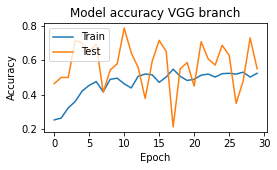

In [28]:
VGG_branch_hist = VGG_branch(Split_X, Y, test_X = test_Split_X, test_Y = test_Y, EPOCH=30, cp_filepath='branch_model')
plt.rcParams["figure.figsize"] = (4,2)
plotting(VGG_branch_hist, 'VGG branch')

In [29]:
print(max(VGG_branch_hist.history['val_accuracy']))

0.7857142686843872


In [37]:
VGG_branch_hist_norm = VGG_branch(Split_X_n, Y, test_X = test_Split_X_n, test_Y = test_Y, EPOCH=30, cp_filepath='branch_model_norm')

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 amplitude (InputLayer)         [(None, 167, 1)]     0           []                               
                                                                                                  
 phase (InputLayer)             [(None, 167, 1)]     0           []                               
                                                                                                  
 conv1d_48 (Conv1D)             (None, 167, 64)      256         ['amplitude[0][0]']              
                                                                                                  
 conv1d_56 (Conv1D)             (None, 167, 64)      256         ['phase[0][0]']                  
                                                                                            

2022-05-11 23:23:22.081415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.4085 - accuracy: 0.2717

2022-05-11 23:23:23.209212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ./model/branch_model_norm/assets
15/15 [==============================] - 11s 706ms/step - loss: 1.4085 - accuracy: 0.2717 - val_loss: 1.3691 - val_accuracy: 0.2143
Epoch 2/30
15/15 [==============================] - 10s 671ms/step - loss: 1.3409 - accuracy: 0.3391 - val_loss: 1.3407 - val_accuracy: 0.6357
Epoch 3/30
15/15 [==============================] - 6s 404ms/step - loss: 1.4001 - accuracy: 0.2870 - val_loss: 1.3496 - val_accuracy: 0.5786
Epoch 4/30
15/15 [==============================] - 6s 414ms/step - loss: 1.3148 - accuracy: 0.3565 - val_loss: 1.2426 - val_accuracy: 0.4786
Epoch 5/30
15/15 [==============================] - 6s 388ms/step - loss: 1.1734 - accuracy: 0.4652 - val_loss: 1.2262 - val_accuracy: 0.5143
Epoch 6/30
15/15 [==============================] - 10s 667ms/step - loss: 1.1674 - accuracy: 0.4587 - val_loss: 1.1461 - val_accuracy: 0.6643
Epoch 7/30
15/15 [==============================] - 6s 431ms/step - loss: 1.1095 - accur

In [38]:
print(max(VGG_branch_hist_norm.history['val_accuracy']))

0.8071428537368774


2022-05-11 23:16:02.536817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/5 [=======================>......] - ETA: 0s - loss: 1.1274 - accuracy: 0.7812

2022-05-11 23:16:02.798939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 33ms/step - loss: 1.1258 - accuracy: 0.7857
[1.1258056163787842, 0.7857142686843872]
[[21  1  7  1]
 [ 0 10  0  0]
 [ 0  0 26  4]
 [ 0 12  5 53]]


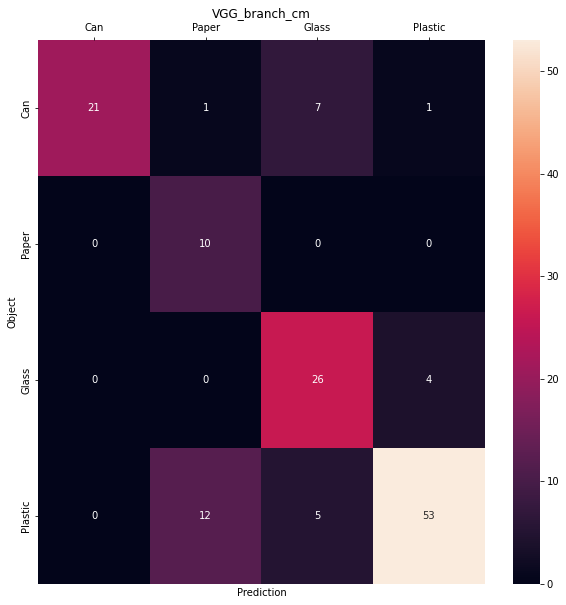

In [30]:
VGG_branch_model = tf.keras.models.load_model('./model/branch_model')
VGG_branch_pred = VGG_branch_model.predict({"amplitude": test_Split_X_n[:,0,:], "phase": test_Split_X_n[:,1,:]})
VGG_branch_evl = VGG_branch_model.evaluate({"amplitude": test_Split_X_n[:,0,:], "phase": test_Split_X_n[:,1,:]}, {"material_output" : test_Y})
print(VGG_branch_evl)
test_Y_class = np.argmax(test_Y, axis = -1)
VGG_branch_cm = confusion_matrix(test_Y_class, np.argmax(VGG_branch_pred, axis = -1))

print(VGG_branch_cm)
heatmap(VGG_branch_cm, 'VGG_branch_cm')

2022-05-11 23:48:27.838551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/5 [=====>........................] - ETA: 0s - loss: 1.0511 - accuracy: 0.8125

2022-05-11 23:48:28.167310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 38ms/step - loss: 1.0512 - accuracy: 0.8071
[1.0511720180511475, 0.8071428537368774]
[[19  0  9  2]
 [ 0  0  0 10]
 [ 0  0 28  2]
 [ 0  1  3 66]]


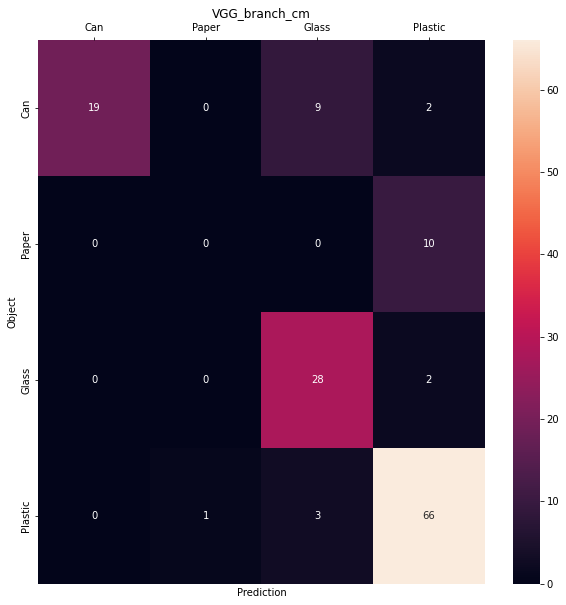

In [39]:
VGG_branch_model_norm = tf.keras.models.load_model('./model/branch_model_norm')
VGG_branch_norm_pred = VGG_branch_model_norm.predict({"amplitude": test_Split_X_n[:,0,:], "phase": test_Split_X_n[:,1,:]})
VGG_branch_norm_evl = VGG_branch_model_norm.evaluate({"amplitude": test_Split_X_n[:,0,:], "phase": test_Split_X_n[:,1,:]}, {"material_output" : test_Y})
print(VGG_branch_norm_evl)
test_Y_class = np.argmax(test_Y, axis = -1)
VGG_branch_norm_cm = confusion_matrix(test_Y_class, np.argmax(VGG_branch_norm_pred, axis = -1))

print(VGG_branch_norm_cm)
heatmap(VGG_branch_norm_cm, 'VGG_branch_cm')

In [72]:
def classifier_data(x):
    abs_x = np.abs(x)
    return np.concatenate((abs_x, np.expand_dims(np.max(abs_x, axis = 1), axis = 1), np.expand_dims(np.min(abs_x, axis = 1), axis = 1), np.expand_dims(np.mean(abs_x, axis = 1), axis = 1)), axis = 1)

In [76]:
X_c = classifier_data(X)
test_X_c = classifier_data(test_X)
Y_c = np.argmax(Y, axis = 1)
test_Y_c = np.argmax(test_Y, axis = 1)

In [77]:
print(X_c.shape)

(460, 170)


In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(X_c, Y_c)

RandomForestClassifier(n_estimators=10, random_state=0)

In [81]:
model.score(test_X_c, test_Y_c)

0.42857142857142855

In [83]:
rf_cm = confusion_matrix(test_Y_c, model.predict(test_X_c))

In [84]:
rf_cm

array([[18,  0,  9,  3],
       [ 0,  0,  0, 10],
       [ 3,  0, 17, 10],
       [ 1, 21, 23, 25]])

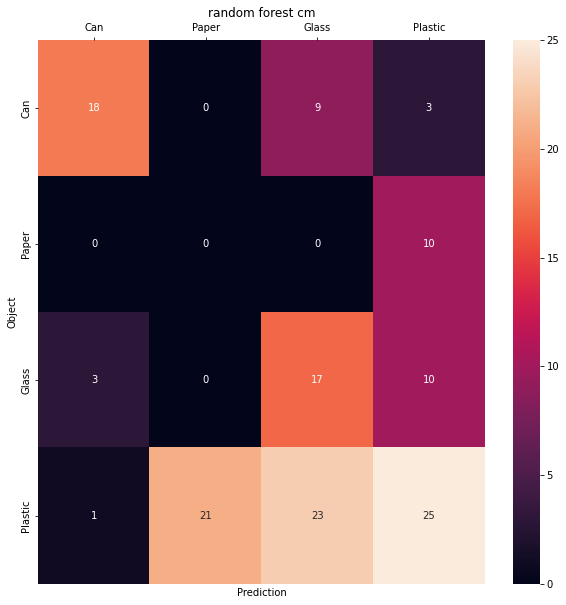

In [85]:
heatmap(rf_cm, 'random forest cm')